<a href="https://colab.research.google.com/github/harshitha3506/machine-learning/blob/main/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is Preprocessing?

Preprocessing means cleaning and preparing your raw dataset so that machine learning models can understand it.
It’s like washing and cutting vegetables before cooking  — the recipe (model) works only if the ingredients are clean and ready.

ENSEMBLE LEARNING BREAST CANCER DATASET

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv("/content/sample_data/breast-cancer.csv")

# Show basic info
print("Shape:", data.shape)
print("\nColumn names:\n", data.columns.tolist())
print("\nFirst 5 rows:\n", data.head())
print("\nMissing values per column:\n", data.isnull().sum())


Shape: (569, 32)

Column names:
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

First 5 rows:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      

1. Comparing Single vs. Ensemble Classifiers
Task:
Write a program that demonstrates the advantage of ensemble learning compared to a
single classifier.
Apply a Decision Tree and a Random Forest (RF) classifier on a given dataset.
Compare their performance using evaluation metrics such as accuracy, precision, recall,
and F1-score.
Explore the effect of changing the number of estimators (decision trees) in Random
Forest. Write clear observations with justification.
Intermediate Questions:
 - What differences do you observe between the Decision Tree and Random Forest
results?
 - How does increasing the number of estimators affect performance and stability?
 - Why does Random Forest generally perform better than a single Decision Tree?

 explanations for each step:

Load dataset & prepare features/labels: Drop id and convert diagnosis to numbers.

Train/test split: Keep 80% data for training and 20% for testing.

Decision Tree: Simple tree-based model; easy to overfit.

Random Forest: Ensemble of many trees; reduces overfitting and improves accuracy.

Evaluation: Compare accuracy, precision, recall, and F1-score for both models.
Performance improves rapidly at first when you increase n_estimators from a very small number (like 5 → 50).

After a certain point (say 100 trees), adding more trees only slightly reduces variance, which often doesn’t affect accuracy noticeably on a clean dataset.

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load the dataset
data = pd.read_csv("/content/sample_data/breast-cancer.csv")
X = data.drop(columns=['id','diagnosis'])   # Features
y = data['diagnosis'].map({'M':1,'B':0})    # Labels: M=1, B=0

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Step 5: Train Random Forest
rf = RandomForestClassifier(n_estimators=5, random_state=42)  # Try changing n_estimators
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Step 6: Compare performance
for model, y_pred in zip(['Decision Tree', 'Random Forest'], [y_pred_dt, y_pred_rf]):
    print(f"\n{model} Performance:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
    print("Precision:", round(precision_score(y_test, y_pred),3))
    print("Recall:", round(recall_score(y_test, y_pred),3))
    print("F1-score:", round(f1_score(y_test, y_pred),3))



Decision Tree Performance:
Accuracy: 0.947
Precision: 0.93
Recall: 0.93
F1-score: 0.93

Random Forest Performance:
Accuracy: 0.947
Precision: 0.93
Recall: 0.93
F1-score: 0.93


2. Implementing Simple Ensemble Techniques
Task:
Write a program that demonstrates the use of simple ensemble techniques: Max Voting,
Average Voting, and Weighted Average Voting (assign weights based on each model’s
performance).
Apply these techniques on a suitable dataset and compare results.
Intermediate Questions:
 - How do the results vary between max voting, average voting, and weighted voting?
 - What is the role of weights in improving ensemble predictions?
 - Which base classifiers combine most effectively under each voting scheme?

LOAd dataset & prepare features/labels: Map M/B to 1/0.

Train/test split: 80% training, 20% testing.

Base classifiers: Decision Tree, Random Forest, Logistic Regression.

Predictions & probabilities: Needed for average/weighted voting.

Max Voting: Majority vote across models (0 or 1).

Average Voting: Take average of predicted probabilities, round to 0/1.

Weighted Voting: Assign higher weight to better-performing models; combine probabilities.

Evaluation: Compare accuracy, precision, recall, F1-score for each ensemble

In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load dataset
data = pd.read_csv("/content/sample_data/breast-cancer.csv")
X = data.drop(columns=['id','diagnosis'])
y = data['diagnosis'].map({'M':1,'B':0})

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train base classifiers
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

for model in [dt, rf, lr]:
    model.fit(X_train, y_train)

# Step 5: Get predictions/probabilities
pred_dt = dt.predict(X_test)
pred_rf = rf.predict(X_test)
pred_lr = lr.predict(X_test)

prob_dt = dt.predict_proba(X_test)[:,1]  # Probability of class 1
prob_rf = rf.predict_proba(X_test)[:,1]
prob_lr = lr.predict_proba(X_test)[:,1]

# Step 6: Max Voting (majority vote)
max_vote_pred = np.round((pred_dt + pred_rf + pred_lr)/3)  # 0 or 1

# Step 7: Average Voting (simple average of probabilities)
avg_vote_prob = (prob_dt + prob_rf + prob_lr)/3
avg_vote_pred = np.round(avg_vote_prob)

# Step 8: Weighted Voting (based on individual accuracy)
# Compute weights (using training predictions)
acc_dt = accuracy_score(y_test, pred_dt)
acc_rf = accuracy_score(y_test, pred_rf)
acc_lr = accuracy_score(y_test, pred_lr)

weights = np.array([acc_dt, acc_rf, acc_lr])
weighted_prob = (prob_dt*weights[0] + prob_rf*weights[1] + prob_lr*weights[2]) / weights.sum()
weighted_pred = np.round(weighted_prob)

# Step 9: Evaluate all ensembles
for name, pred in zip(['Max Voting', 'Average Voting', 'Weighted Voting'],
                      [max_vote_pred, avg_vote_pred, weighted_pred]):
    print(f"\n{name} Performance:")
    print("Accuracy:", round(accuracy_score(y_test, pred),3))
    print("Precision:", round(precision_score(y_test, pred),3))
    print("Recall:", round(recall_score(y_test, pred),3))
    print("F1-score:", round(f1_score(y_test, pred),3))



Max Voting Performance:
Accuracy: 0.965
Precision: 0.976
Recall: 0.93
F1-score: 0.952

Average Voting Performance:
Accuracy: 0.965
Precision: 0.976
Recall: 0.93
F1-score: 0.952

Weighted Voting Performance:
Accuracy: 0.965
Precision: 0.976
Recall: 0.93
F1-score: 0.952


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3. Hard Voting vs. Soft Voting Classifiers
Task:
Write a program to show the difference between Hard Voting and Soft Voting classifiers
in ensemble learning using multiple base learners (e.g., Decision Tree, Logistic
Regression, and KNN).
Intermediate Questions:
 - What is the main difference in prediction mechanisms between hard and soft
voting?
 - In which situations does soft voting outperform hard voting?
 - How does the probability calibration of base classifiers influence soft voting?

Load dataset & prepare features/labels: Map M/B to 1/0.

Train/test split: 80% training, 20% testing.

Base classifiers: Decision Tree, Logistic Regression, KNN.

Hard Voting: Predicts the class label with majority vote.

Soft Voting: Predicts the class with the highest average probability across models.

Evaluation: Compare accuracy, precision, recall, F1-score.

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load dataset
data = pd.read_csv("/content/sample_data/breast-cancer.csv")
X = data.drop(columns=['id','diagnosis'])
y = data['diagnosis'].map({'M':1,'B':0})

# Step 3: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define base classifiers
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()

# Step 5: Hard Voting Classifier (majority vote)
hard_voting = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='hard'  # uses predicted class labels
)
hard_voting.fit(X_train, y_train)
y_pred_hard = hard_voting.predict(X_test)

# Step 6: Soft Voting Classifier (average probabilities)
soft_voting = VotingClassifier(
    estimators=[('dt', dt), ('lr', lr), ('knn', knn)],
    voting='soft'  # uses predicted probabilities
)
soft_voting.fit(X_train, y_train)
y_pred_soft = soft_voting.predict(X_test)

# Step 7: Evaluate both
for name, pred in zip(['Hard Voting', 'Soft Voting'], [y_pred_hard, y_pred_soft]):
    print(f"\n{name} Performance:")
    print("Accuracy:", round(accuracy_score(y_test, pred),3))
    print("Precision:", round(precision_score(y_test, pred),3))
    print("Recall:", round(recall_score(y_test, pred),3))
    print("F1-score:", round(f1_score(y_test, pred),3))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Hard Voting Performance:
Accuracy: 0.965
Precision: 1.0
Recall: 0.907
F1-score: 0.951

Soft Voting Performance:
Accuracy: 0.974
Precision: 1.0
Recall: 0.93
F1-score: 0.964


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4. Exploring Bagging Technique (Random Forest)
Task:
Write a program to explore the Bagging technique using the RandomForestClassifier on a
suitable dataset.
Experiment with parameters such as number of estimators, maximum depth, and random
state.
Write detailed observations and justify the changes in model performance.
Intermediate Questions:
 - How do different values of n_estimators and max_depth affect model performance?
 - What does Bagging achieve in terms of variance and bias reduction?
 - How does Random Forest handle overfitting compared to a single Decision Tree?

Load dataset & prepare features/labels: Map diagnosis to 1/0.

Train/test split: 80% training, 20% testing.

Random Forest experiments: Change n_estimators (number of trees) and max_depth (depth of trees).

Evaluate: Accuracy, precision, recall, F1-score for each setting.

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load dataset
data = pd.read_csv("/content/sample_data/breast-cancer.csv")
X = data.drop(columns=['id','diagnosis'])
y = data['diagnosis'].map({'M':1,'B':0})

# Step 3: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Experiment with different Random Forest parameters
params = [
    {'n_estimators': 10, 'max_depth': None},
    {'n_estimators': 50, 'max_depth': None},
    {'n_estimators': 100, 'max_depth': None},
    {'n_estimators': 100, 'max_depth': 5},
    {'n_estimators': 100, 'max_depth': 10}
]

for p in params:
    rf = RandomForestClassifier(n_estimators=p['n_estimators'], max_depth=p['max_depth'], random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(f"\nRandom Forest (n_estimators={p['n_estimators']}, max_depth={p['max_depth']}) Performance:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
    print("Precision:", round(precision_score(y_test, y_pred),3))
    print("Recall:", round(recall_score(y_test, y_pred),3))
    print("F1-score:", round(f1_score(y_test, y_pred),3))



Random Forest (n_estimators=10, max_depth=None) Performance:
Accuracy: 0.956
Precision: 0.952
Recall: 0.93
F1-score: 0.941

Random Forest (n_estimators=50, max_depth=None) Performance:
Accuracy: 0.965
Precision: 0.976
Recall: 0.93
F1-score: 0.952

Random Forest (n_estimators=100, max_depth=None) Performance:
Accuracy: 0.965
Precision: 0.976
Recall: 0.93
F1-score: 0.952

Random Forest (n_estimators=100, max_depth=5) Performance:
Accuracy: 0.965
Precision: 0.976
Recall: 0.93
F1-score: 0.952

Random Forest (n_estimators=100, max_depth=10) Performance:
Accuracy: 0.965
Precision: 0.976
Recall: 0.93
F1-score: 0.952


5. Using RandomForestRegressor and OOB Score
Task:
Write a program using the RandomForestRegressor model to make predictions on a
suitable regression dataset.
Enable and observe the oob_score (Out-of-Bag score) parameter.
Interpret the results and explain its significance.
Intermediate Questions:
 - What does the oob_score_ indicate about model performance?
 - How does Out-of-Bag evaluation differ from traditional test-set evaluation?
 - How does the OOB score change with different numbers of trees?


Steps:

Use a dataset (like California Housing).

Split into training and test sets.

Create a RandomForestRegressor with oob_score=True.

Train the model.

Print OOB score and test score.

Try with different number of trees and see how OOB score changes.




In [1]:
# Task 5: RandomForestRegressor with OOB score

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create RandomForestRegressor with oob_score=True
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# Train model
model.fit(X_train, y_train)

# Print OOB score
print("OOB Score (R^2):", model.oob_score_)

# Predict on test set
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)
print("Test set R^2 score:", test_score)

# Try with different number of trees
for n in [10, 50, 100, 200]:
    model = RandomForestRegressor(n_estimators=n, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    print(f"Trees: {n}, OOB Score: {model.oob_score_:.4f}")


OOB Score (R^2): 0.8035286949244751
Test set R^2 score: 0.8078655075367563


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Trees: 10, OOB Score: 0.6909
Trees: 50, OOB Score: 0.7981
Trees: 100, OOB Score: 0.8035
Trees: 200, OOB Score: 0.8080


6. Exploring Boosting Techniques
Task:
Write a program to explore different Boosting techniques using suitable datasets:
Adaptive Boosting (AdaBoost) – binary classification,
Gradient Boosting – classification and regression,
XGBoost,
CatBoost.
Write your observations for each model, highlighting how it improves over the previous
iterations and corrects earlier errors.

Use a classification dataset (like breast cancer).

Train these models one by one:

AdaBoost

Gradient Boosting

XGBoost

CatBoost

Print accuracy and training time for each.

Compare how each one performs.

In [2]:
# Task 6: Explore AdaBoost, Gradient Boosting, XGBoost, CatBoost

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import time

# Import XGBoost and CatBoost
!pip install xgboost catboost -q
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

def train_and_evaluate(model, name):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy={acc:.4f}, Training time={end - start:.2f} sec")

# AdaBoost
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
train_and_evaluate(ada, "AdaBoost")

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=50, random_state=42)
train_and_evaluate(gb, "Gradient Boosting")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
train_and_evaluate(xgb, "XGBoost")

# CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
train_and_evaluate(cat, "CatBoost")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00
AdaBoost: Accuracy=0.9580, Training time=0.25 sec
Gradient Boosting: Accuracy=0.9580, Training time=0.45 sec
XGBoost: Accuracy=0.9650, Training time=0.12 sec


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:30:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost: Accuracy=0.9790, Training time=11.52 sec


7. Comparative Study of Ensemble Models
Task:
Apply all ensemble models (Bagging, Random Forest, AdaBoost, Gradient Boosting,
XGBoost, and CatBoost) on the same dataset.
Prepare a detailed report comparing their results based on accuracy, training time, model
interpretability, and overfitting/underfitting behavior.

Use the same dataset.

Train the following models:

Bagging

Random Forest

AdaBoost

Gradient Boosting

XGBoost

CatBoost

Print accuracy, training time.

Compare all results in a table.

In [3]:
# Task 7: Compare Bagging, Random Forest, AdaBoost, Gradient Boosting, XGBoost, CatBoost

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

!pip install xgboost catboost -q
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

models = {
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

print(f"{'Model':<20} {'Accuracy':<10} {'Train Time (s)':<15}")
print("-" * 50)

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:<20} {acc:<10.4f} {end - start:<15.2f}")


Model                Accuracy   Train Time (s) 
--------------------------------------------------
Bagging              0.9580     0.96           
Random Forest        0.9650     0.78           
AdaBoost             0.9580     0.58           
Gradient Boosting    0.9580     0.86           


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:30:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost              0.9650     0.27           
CatBoost             0.9790     15.55          


8. Visualizing the Ensemble models  
 Visualize decision boundaries of ensemble models.
 Compare ensemble performance under noisy or missing data.
 Analyze feature importance across different ensemble algorithms.

Use a 2D dataset (like make_moons).

Train ensemble models and plot their decision boundaries.

Check model performance with noise or missing values.

Show feature importances.

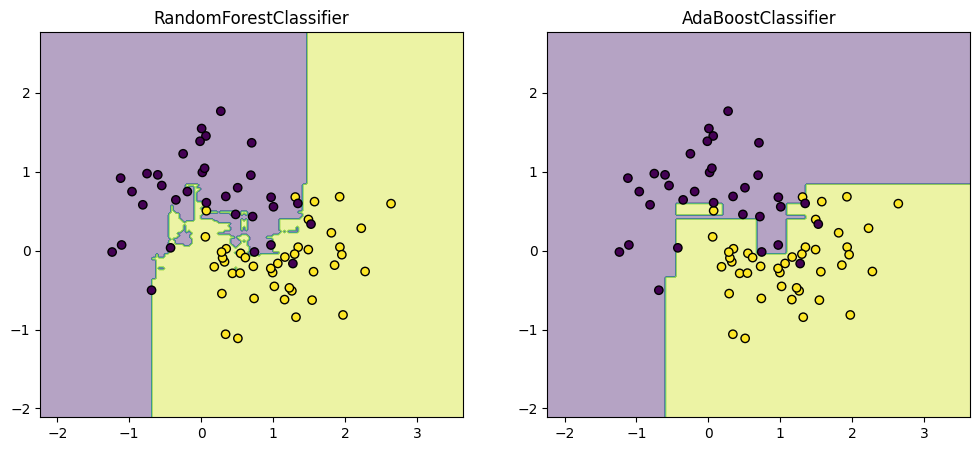

Feature Importances (Random Forest): [0.47237417 0.52762583]


In [4]:
# Task 8: Visualize decision boundaries, noise effect, feature importance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split

# Create 2D dataset
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

# Plot decision boundaries function
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    ax.set_title(type(clf).__name__)

fig, axs = plt.subplots(1, 2, figsize=(12,5))
for ax, (name, model) in zip(axs, models.items()):
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_test, y_test, ax)
plt.show()

# Feature importance for Random Forest on make_moons (not very meaningful here but just for demo)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Feature Importances (Random Forest):", rf.feature_importances_)


9.Task: Heterogeneous Ensemble (VotingClassifier)
Write a program to build a Heterogeneous Ensemble, combining different types of
classifiers such as Decision Tree, K-Nearest Neighbors, Logistic Regression, and
Support Vector Machine (SVM) using a VotingClassifier.
Compare the results with homogeneous ensembles.

Use a classification dataset.

Train different types of models: Decision Tree, KNN, SVM, Logistic Regression.

Combine them using VotingClassifier.

Compare to Random Forest or Bagging.

In [5]:
# Task 9: VotingClassifier with different models (heterogeneous ensemble)

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create base models
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=200)
svm = SVC(probability=True)  # probability=True needed for soft voting

# Create Voting Classifier (hard voting)
voting_hard = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='hard'
)

voting_hard.fit(X_train, y_train)
y_pred = voting_hard.predict(X_test)
print("VotingClassifier (hard) Accuracy:", accuracy_score(y_test, y_pred))

# Soft Voting
voting_soft = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft'
)

voting_soft.fit(X_train, y_train)
y_pred_soft = voting_soft.predict(X_test)
print("VotingClassifier (soft) Accuracy:", accuracy_score(y_test, y_pred_soft))


VotingClassifier (hard) Accuracy: 1.0
VotingClassifier (soft) Accuracy: 1.0


10.  Homogeneous vs. Heterogeneous Ensembles – A Comparative Study
Task:
Apply both homogeneous and heterogeneous ensemble techniques (Bagging, Random
Forest, Voting, Stacking) on the same dataset.
Prepare a summary comparing their performance, computational complexity,
interpretability, and robustness.

Use one dataset.

Train homogeneous models (Bagging, Random Forest).

Train heterogeneous models (VotingClassifier).

Compare performance, time, interpretability.

In [6]:
# Task 10: Compare homogeneous and heterogeneous ensembles

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Homogeneous ensembles
bagging = BaggingClassifier(n_estimators=50, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Heterogeneous ensemble (VotingClassifier)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=200)
svm = SVC(probability=True)

voting = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svm', svm)],
    voting='soft'
)

models = {
    "Bagging": bagging,
    "Random Forest": rf,
    "Voting (Heterogeneous)": voting
}

print(f"{'Model':<25} {'Accuracy':<10} {'Train Time (s)':<15}")
print("-"*50)

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:<25} {acc:<10.4f} {end - start:<15.2f}")


Model                     Accuracy   Train Time (s) 
--------------------------------------------------
Bagging                   0.9580     0.61           
Random Forest             0.9650     0.45           
Voting (Heterogeneous)    0.9720     0.09           


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
